# Predicting House Sale Price
### Nicolas Decavel-Bueff, Teddy Mefford, Jiahui Jin

___________
## Contents:
#### 1. Initial Data Exploration
#### 2. Log-Linear Discussion
#### 3. Feature Engineering
#### 4. Model Scripts
#### 5. Model Creation
#### 6. Influential Points
#### 7. Multicollinearity
#### 8. Mallow's CP and AIC/BIC
#### 9. Extended Model
#### 10. Evaluation

_________
## 1. Initial Data Exploration

In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stt
import seaborn as sns
import pylab 
import scipy.stats as stats
import scipy
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [78]:
housedata = pd.read_csv('Data/housing/train.csv')
housedata.shape

(1460, 81)

In [79]:
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

________
As we can see with our initial view of the data, we have a 1460 rows and 80 columns of data. Among the columns, we see that there is a good mix of int64 and object datatypes. Furthermore, we see that there are some columns that are missing a lot of data: [PoolQC, Fence, MiscFeature, FirePlaceQu, and Alley]

### First model
Our first model will use 5 Numerical Variables, which we will explore now through visualization.
_________

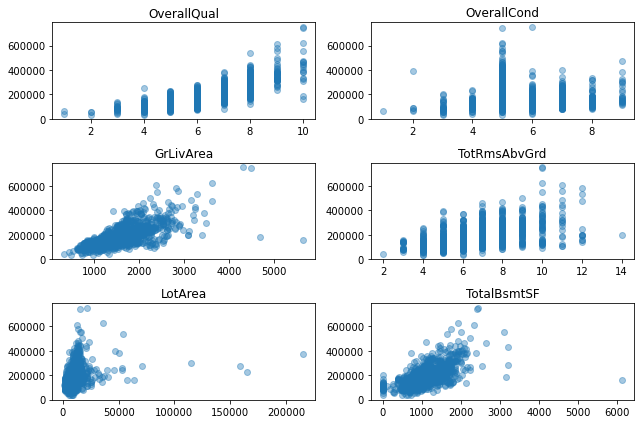

In [8]:
fig,ax =  plt.subplots(3,2, figsize = (9,6))

x1 = housedata.OverallQual.values.reshape(-1,1)
x2 = housedata.OverallCond.values.reshape(-1,1)
x3 = housedata.GrLivArea.values.reshape(-1,1)
x4 = housedata.TotRmsAbvGrd.values.reshape(-1,1)
x5 = housedata.LotArea.values.reshape(-1,1)
x6 = housedata.TotalBsmtSF.values.reshape(-1,1)

y = housedata.SalePrice.values.reshape(-1,1)
y2 = np.log(housedata.SalePrice.values.reshape(-1,1))

ax[0][0].scatter(x1,y, alpha = 0.4)
ax[0][0].set_title('OverallQual')
ax[0][1].scatter(x2,y, alpha = 0.4)
ax[0][1].set_title('OverallCond')
ax[1][0].scatter(x3,y, alpha = 0.4)
ax[1][0].set_title('GrLivArea')
ax[1][1].scatter(x4,y, alpha = 0.4)
ax[1][1].set_title('TotRmsAbvGrd')
ax[2][0].scatter(x5,y, alpha = 0.4)
ax[2][0].set_title('LotArea')
ax[2][1].scatter(x6,y, alpha = 0.4)
ax[2][1].set_title('TotalBsmtSF')

plt.tight_layout()
plt.show()

In [258]:
# We add some categorical variables as well to get a better model

In [259]:
exploratory_model = smf.ols('SalePrice ~ TotRmsAbvGrd + GrLivArea + OverallCond + OverallQual + TotalBsmtSF + LotArea + C(Neighborhood) + C(ExterQual) + C(BsmtQual)',housedata).fit()
exploratory_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:01:38   Log-Likelihood:                -16805.
No. Observations:                1423   AIC:                         3.368e+04
Df Residuals:                    1386   BIC:                         3.388e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3.446e+04   1.52e+04      2.274      0.023    4727.091    6.42e+04
C(Neighborhood)[T.Blueste] -2.076e+04   2.49e+04     -0.833      0.405   -6.97e+04    2.81e+04
C(Neighborhood)[T.BrDale]  -2.893e+04   1.21e+04     -2.385      0.017   -5.27e+04   -5135.060
C(Neighborhood)[T.BrkSide] -1.683e+04   9908.721     -1.699      0.090   -3.63e+04    2605.993
C(Neighborhood)[T.ClearCr]  9177.1869   1.09e+04      0.841      0.400   -1.22e+04    3.06e+04
C(Neighborhood)[T.CollgCr]  1.068e+04   8527.683      1.252      0.211   -6052.484    2.74e+04
C(Neighborhood)[T.Crawfor]  8829.0232   9811.285      0.900      0.368   -1.04e+04    2.81e+04
C(Neighborhood)[T.Edwards] -2.517e+04   9350.564     -2.692      0.007   -4.35e+04   -6828.825
C(Neighborhood)[T.Gilbert]  5600.7647   9082.757      0.617      0.538   -1.22e+04    2.34e+04
C(Neighborhood)[T.IDOTRR]  -2.903e+04   1.05e+04     -2.767      0.006   -4.96e+04   -8451.944
C(Neighborhood)[T.MeadowV] -2.017e+04   1.19e+04     -1.693      0.091   -4.35e+04    3201.799
C(Neighborhood)[T.Mitchel] -8078.5203   9797.401     -0.825      0.410   -2.73e+04    1.11e+04
C(Neighborhood)[T.NAmes]   -9223.2251   9038.438     -1.020      0.308    -2.7e+04    8507.270
C(Neighborhood)[T.NPkVill] -1.253e+04   1.39e+04     -0.901      0.368   -3.98e+04    1.48e+04
C(Neighborhood)[T.NWAmes]  -5935.8759   9378.284     -0.633      0.527   -2.43e+04    1.25e+04
C(Neighborhood)[T.NoRidge]  6.668e+04   9859.514      6.763      0.000    4.73e+04     8.6e+04
C(Neighborhood)[T.NridgHt]  4.119e+04   9159.895      4.496      0.000    2.32e+04    5.92e+04
C(Neighborhood)[T.OldTown] -3.321e+04   9471.867     -3.507      0.000   -5.18e+04   -1.46e+04
C(Neighborhood)[T.SWISU]   -3.235e+04   1.11e+04     -2.909      0.004   -5.42e+04   -1.05e+04
C(Neighborhood)[T.Sawyer]  -7098.7753   9610.642     -0.739      0.460    -2.6e+04    1.18e+04
C(Neighborhood)[T.SawyerW]  5553.8651   9313.829      0.596      0.551   -1.27e+04    2.38e+04
C(Neighborhood)[T.Somerst]  1.882e+04   8831.065      2.131      0.033    1493.104    3.61e+04
C(Neighborhood)[T.StoneBr]  5.844e+04   1.05e+04      5.569      0.000    3.79e+04     7.9e+04
C(Neighborhood)[T.Timber]   1.266e+04   9907.682      1.278      0.201   -6772.244    3.21e+04
C(Neighborhood)[T.Veenker]  3.275e+04   1.29e+04      2.534      0.011    7392.882    5.81e+04
C(ExterQual)[T.Fa]         -3.221e+04   1.21e+04     -2.651      0.008    -5.6e+04   -8375.099
C(ExterQual)[T.Gd]         -2.935e+04   5892.604     -4.981      0.000   -4.09e+04   -1.78e+04
C(ExterQual)[T.TA]         -3.456e+04   6577.527     -5.255      0.000   -4.75e+04   -2.17e+04
C(BsmtQual)[T.Fa]          -4.994e+04   7767.567     -6.429      0.000   -6.52e+04   -3.47e+04
C(BsmtQual)[T.Gd]          -4.417e+04   423

In [260]:
aov_table = sm.stats.anova_lm(exploratory_model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Neighborhood),3.509052e+11,24.0,13.439489,6.101406e-48
C(ExterQual),3.067797e+10,3.0,9.399607,3.764563e-06
C(BsmtQual),1.233513e+11,3.0,37.794334,1.780935e-23
TotRmsAbvGrd,9.923597e+08,1.0,0.912165,3.397072e-01
GrLivArea,1.497305e+11,1.0,137.630425,2.271419e-30
OverallCond,6.579958e+10,1.0,60.482168,1.440051e-14
OverallQual,1.254763e+11,1.0,115.336289,6.717862e-26
TotalBsmtSF,5.291509e+10,1.0,48.638901,4.749575e-12
LotArea,3.617829e+10,1.0,33.254644,9.954394e-09
Residual,1.507853e+12,1386.0,NaN,NaN


_________
Looking at the anova table, we can see that some variables are insignificant (TotRmsAbvGrd, OverallCond). Note that this is a partial anova test (typ=2) and for every variable, it compares the model with and without it.
_________


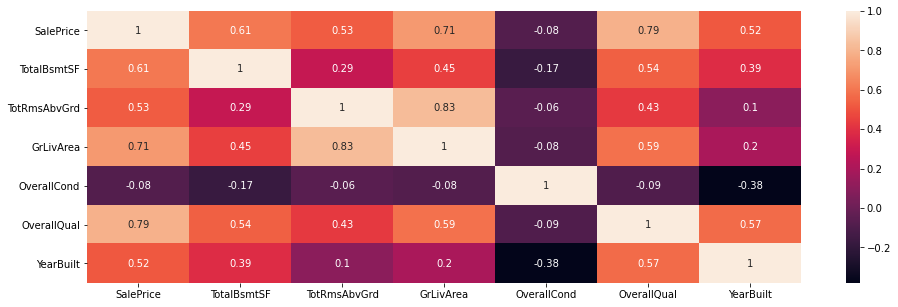

In [11]:
housedata_red = housedata[['SalePrice','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'OverallCond', 'OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual']]
correlation_matrix = housedata_red.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

_____________
## 2. Log-Linear Model? (View on heteroskedasticity)

In [28]:
housedata2 = housedata.drop([153,249,313,335,523,706,1298])
exploratory_model_data2 = smf.ols('SalePrice ~ TotRmsAbvGrd + GrLivArea + OverallCond + OverallQual + C(Neighborhood) + C(ExterQual) + C(BsmtQual)',housedata2).fit()

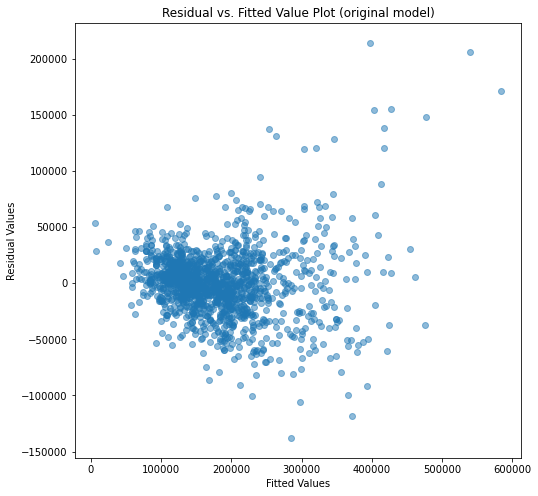

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(exploratory_model_data2.fittedvalues, exploratory_model_data2.resid, alpha = 0.5)
ax.set_title('Residual vs. Fitted Value Plot (original model)')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residual Values')
plt.show()

In [30]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(exploratory_model_data2.resid, exploratory_model_data2.model.exog)
for name, test in zip(name, test):
    print(name,test)

Lagrange multiplier statistic 322.97842644265074
p-value 8.33281944094243e-49
f-value 12.00216358965898
f p-value 2.0883683099425803e-56


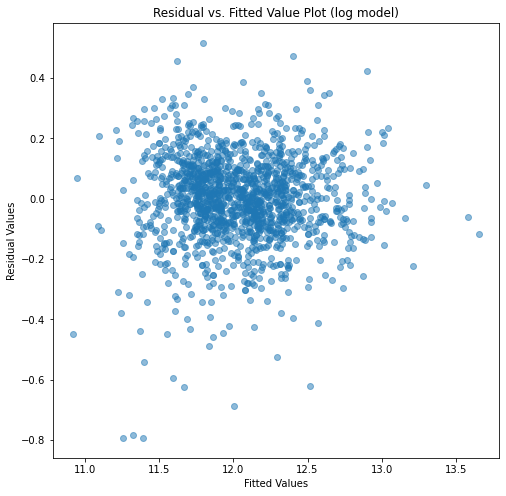

In [31]:
exploratory_model_log = smf.ols('np.log(SalePrice) ~ TotRmsAbvGrd + GrLivArea + OverallCond + OverallQual + C(Neighborhood) + C(ExterQual) + C(BsmtQual)',housedata2).fit()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(exploratory_model_log.fittedvalues, exploratory_model_log.resid, alpha = 0.5)
ax.set_title('Residual vs. Fitted Value Plot (log model)')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residual Values')
plt.show()

In [33]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(exploratory_model_log.resid, exploratory_model_log.model.exog)
for name, test in zip(name, test):
    print(name,test)

Lagrange multiplier statistic 135.65891776454737
p-value 4.350074392415366e-14
f-value 4.303654798393047
f p-value 6.2685555680976014e-15


________
Comments for section 2:
1. Our first graph shows a funnel-like shape which tells us that are model may suffer from heteroskedasticity.
2. The breusch-pagan test shows that are exploratory model has significant heteroskedasticity.
3. **This leads us to do a log transform of our predicted variable, SalePrice**
4. The residual vs. fitted value plot after the transformation shows the errors to be much more random.
5. The breusch-pagan test of the new model still fails, but it is an improvement

________
## 3. Feature Engineering
    1. Transform Neighborhood from Categorical to Numerical using the mean of each category.

In [12]:
train_df = pd.read_csv('Data/housing/train.csv')

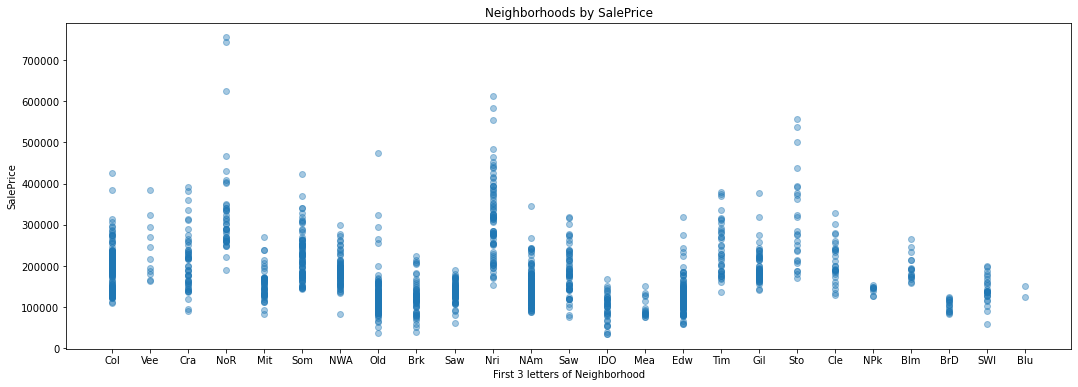

In [13]:
fig, ax = plt.subplots(figsize = (18,6))
ax.scatter(train_df['Neighborhood'], train_df['SalePrice'], alpha = 0.4)
ax.set_xticklabels([i[:3] for i in train_df['Neighborhood'].unique()])
ax.set_title('Neighborhoods by SalePrice')
ax.set_xlabel('First 3 letters of Neighborhood')
ax.set_ylabel('SalePrice')
plt.show()

In [14]:
list_of_neighborhoods = []
for n in train_df['Neighborhood'].unique():
    mean = np.mean(train_df[train_df['Neighborhood'] == n]['SalePrice'])
    median = np.median(train_df[train_df['Neighborhood'] == n]['SalePrice'])
    list_of_neighborhoods.append((n, mean, median))
list_of_neighborhoods.sort(key = lambda x: x[1])
list_of_neighborhoods

[('MeadowV', 98576.4705882353, 88000.0),
 ('IDOTRR', 100123.78378378379, 103000.0),
 ('BrDale', 104493.75, 106000.0),
 ('BrkSide', 124834.05172413793, 124300.0),
 ('Edwards', 128219.7, 121750.0),
 ('OldTown', 128225.30088495575, 119000.0),
 ('Sawyer', 136793.13513513515, 135000.0),
 ('Blueste', 137500.0, 137500.0),
 ('SWISU', 142591.36, 139500.0),
 ('NPkVill', 142694.44444444444, 146000.0),
 ('NAmes', 145847.08, 140000.0),
 ('Mitchel', 156270.1224489796, 153500.0),
 ('SawyerW', 186555.7966101695, 179900.0),
 ('NWAmes', 189050.0684931507, 182900.0),
 ('Gilbert', 192854.50632911394, 181000.0),
 ('Blmngtn', 194870.88235294117, 191000.0),
 ('CollgCr', 197965.77333333335, 197200.0),
 ('Crawfor', 210624.72549019608, 200624.0),
 ('ClearCr', 212565.42857142858, 200250.0),
 ('Somerst', 225379.83720930232, 225500.0),
 ('Veenker', 238772.72727272726, 218000.0),
 ('Timber', 242247.44736842104, 228475.0),
 ('StoneBr', 310499.0, 278000.0),
 ('NridgHt', 316270.6233766234, 315000.0),
 ('NoRidge', 3352

In [15]:
neighbors, mean_list = [], []
map_dic = {}
for count, i in enumerate(list_of_neighborhoods):
    neighbors.append(i[0])
    mean_list.append(i[1])
    map_dic[i[0]] = count

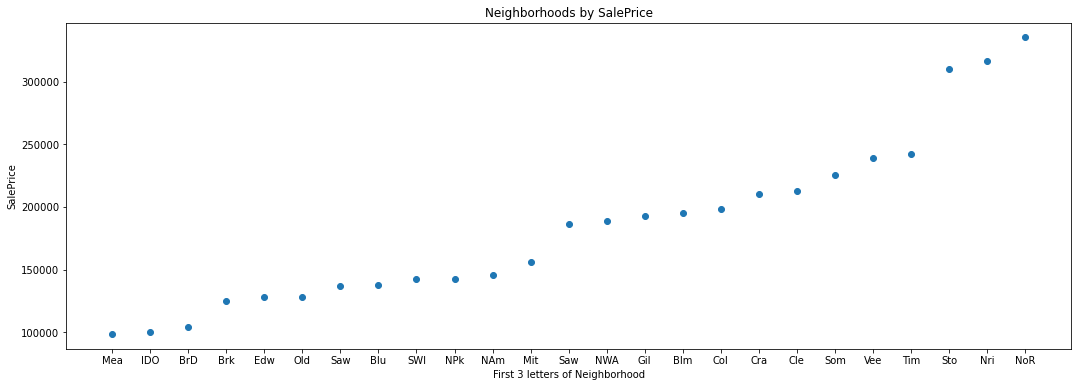

In [16]:
fig, ax = plt.subplots(figsize = (18,6))
ax.scatter(neighbors, mean_list)
ax.set_xticklabels([i[:3] for i in neighbors])
ax.set_title('Neighborhoods by SalePrice')
ax.set_xlabel('First 3 letters of Neighborhood')
ax.set_ylabel('SalePrice')
plt.show()

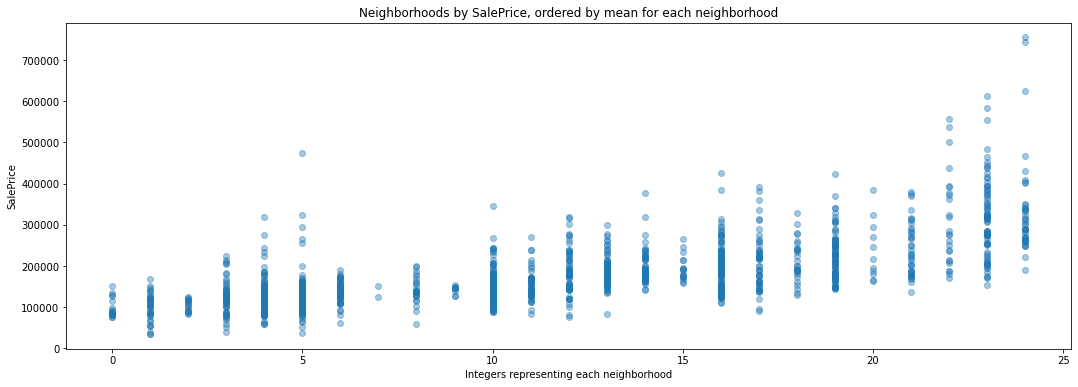

In [17]:
train_df['Neighborhood_linear'] = train_df["Neighborhood"].map(map_dic)
fig, ax = plt.subplots(figsize = (18,6))
ax.scatter(train_df['Neighborhood_linear'], train_df['SalePrice'], alpha = 0.4)
ax.set_title('Neighborhoods by SalePrice, ordered by mean for each neighborhood')
ax.set_xlabel('Integers representing each neighborhood')
ax.set_ylabel('SalePrice')
plt.show()

___________
## 4. Modelling Scripts that will be necessary for creating our modelling algorithm
1. model_helper()
2. create_list()
3. iterate_model()
4. script()

In [18]:
def model_helper(Y, X, data, log=True):
    '''
    This function will take in a Y variable and a list of X variables.
    It will return the adj_r2, and number of observations for the model.
    NOTE: Since CP is useless in this calculation of figuring out what variables
    to include, we will note calculate it.
    '''
    
    try:
        if log == True:
            candidate_model = smf.ols(f'np.log({Y}) ~ {"+".join(X)}', data=data).fit()
        else:
            candidate_model = smf.ols(f'{Y} ~ {"+".join(X)}', data=data).fit()
    except:
        return 0,1000,1
    n = candidate_model.df_resid + candidate_model.df_model + 1
    p = len(candidate_model.params)
    return candidate_model.rsquared_adj, n, p

In [168]:
# We disregard t
t = 'OverallCond, GarageCars, MSSubClass, OverallQual'.split(', ')
def create_list(X_list, ignore = []):
    """
    Given a list of variables in our current model,
    This function will return:
        - pot_col: a list of potential variables to include in our model
    NOTE:
        - We remove Id and SalePrice
        - If it starts with a numeric char, we surround with Q("__")
        - If it is an object, we make it categorical with C(__)
        - Else, we simply add it as is.
    """
    potential_columns = []
    ign_col = ['Id','SalePrice', 'Neighborhood','Condition2','SaleCondition', 'LotFrontage']#, 'OverallQual']#, 'TotalBsmtSF']#'Condition2']
    ign_col.extend(ignore)
    quant = ['Neighborhood', 'MSSubClass', 'GarageCars', 'PoolArea', 'OverallCond', 'Neighborhood_linear']
    for i in train_df.columns:
        if i in ign_col:
            continue
        if i[0].isnumeric() or i in quant: #or 'Cond' in i:     
            potential_columns.append(f'Q("{i}")')
            continue
        elif i in t:
            potential_columns.append(f'C({i})')
            potential_columns.append(f'Q("{i}")')
            continue
        elif train_df[i].dtype == 'object': # Categorical
            potential_columns.append(f'C({i})')
        else:
            potential_columns.append(f'C({i})')
            potential_columns.append(f'Q("{i}")')
    pot_col = [i for i in potential_columns if i not in X_list]
    return pot_col



In [169]:
# 2. Calculate the initial best set of models
def iterate_model(pot_col, X_list,data, log=True):
    """
    Given a a list of potential columns, and a list of variables in current model,
    This function will add 1 new variable and return a list of models with following info:
        [number of parameters, adj_r2, list of predictors]
    NOTE: 
        - If we have less than 30 observations per number of parameters, we ignore (CLT)
        - return a sorted list (by highest adj_r2)
    """
    Y = 'SalePrice'
    list_of_potential = []
    for k in range(0,2):
        for i in itertools.combinations(pot_col, k):
            i = list(i)
            i.extend(X_list)
            adj_r, n, num_params = model_helper(Y,i,data,log=log)
            if n/(30*num_params) < 1:
                continue
            predictors = i
            list_of_potential.append([num_params, adj_r, predictors])
    list_of_potential.sort(key=lambda x:x[1],reverse=True)
    return list_of_potential

In [170]:
# 3. Run the script
"""
This code block will:
    1. Start with a 1 parameter model (Neighborhood)
    2. Run through, at most, 15 iterations of:
        2a. Creating list of potential variables to add (create_list())
        2b. Generate a new_potential_candidate with highest adj_r2 (iterate_model())
        2c. Check if this is higher than our previous candidate's adj_r2
            - If not, break out of loop
        2d. Rerun forloop with updates parameters
"""
def script(initial_model_params, data, log=True):
    for i in range(1,25):
        pot_col = create_list(initial_model_params)
        new_potential_candidate = iterate_model(pot_col, X_list=initial_model_params,data=data, log=log)[0]
        if i > 1 and new_potential_candidate[1] == potential_candidate[1]:

            print("Adding another variable doesn't change the model's adj_r")
            break 
        else:
            potential_candidate = new_potential_candidate
        initial_model_params = potential_candidate[2]


        print(f'Iteration {i}')
        column_names = ["Number of Parameters", "Adj_R2 ", "Predictors"]
        print(f'{column_names[0]:<}  | {column_names[1]} | {column_names[2]:<28}')
        print('-' * 67)
        num_params, adj_r, predictors = potential_candidate
        predictors = f"[{', '.join(predictors)}]"

        print(f'{num_params:^21} | {adj_r:>7.3f} | {predictors}')
        print()
    return potential_candidate

_________
## 5. Run our modeling scripts and display our log_model

In [171]:
potential_candidate = script(initial_model_params = ['Q("OverallQual")'], data = train_df, log=True)

Iteration 1
Number of Parameters  | Adj_R2  | Predictors                  
-------------------------------------------------------------------
          3           |   0.740 | [Q("GrLivArea"), Q("OverallQual")]

Iteration 2
Number of Parameters  | Adj_R2  | Predictors                  
-------------------------------------------------------------------
          4           |   0.805 | [Q("Neighborhood_linear"), Q("GrLivArea"), Q("OverallQual")]

Iteration 3
Number of Parameters  | Adj_R2  | Predictors                  
-------------------------------------------------------------------
          7           |   0.822 | [C(BsmtFullBath), Q("Neighborhood_linear"), Q("GrLivArea"), Q("OverallQual")]

Iteration 4
Number of Parameters  | Adj_R2  | Predictors                  
-------------------------------------------------------------------
          8           |   0.836 | [C(CentralAir), C(BsmtFullBath), Q("Neighborhood_linear"), Q("GrLivArea"), Q("OverallQual")]

Iteration 5
Number of

In [172]:
log_columns = potential_candidate[2].copy()
log_model = smf.ols(f'np.log(SalePrice) ~ {" + ".join(log_columns)}', data = train_df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     311.5
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:46:20   Log-Likelihood:                 1043.1
No. Observations:                1460   AIC:                            -1990.
Df Residuals:                    1412   BIC:                            -1737.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.4542      0.534      4.597      0.000       1.407       3.502
C(Condition1)[T.Feedr]       0.0434      0.023      1.927      0.054      -0.001       0.088
C(Condition1)[T.Norm]        0.0868      0.019      4.675      0.000       0.050       0.123
C(Condition1)[T.PosA]        0.0626      0.048      1.316      0.188      -0.031       0.156
C(Condition1)[T.PosN]        0.0113      0.034      0.336      0.737      -0.055       0.077
C(Condition1)[T.RRAe]       -0.0099      0.041     -0.240      0.810      -0.091       0.071
C(Condition1)[T.RRAn]        0.0847      0.030      2.821      0.005       0.026       0.144
C(Condition1)[T.RRNe]        0.0801      0.088      0.914      0.361      -0.092       0.252
C(Condition1)[T.RRNn]        0.1109      0.057      1.940      0.053      -0.001       0.223
C(KitchenQual)[T.Fa]        -0.0883      0.027     -3.220      0.001      -0.142      -0.035
C(KitchenQual)[T.Gd]        -0.0744      0.014     -5.228      0.000      -0.102      -0.046
C(KitchenQual)[T.TA]        -0.0921      0.017     -5.481      0.000      -0.125      -0.059
C(Functional)[T.Maj2]       -0.1833      0.064     -2.874      0.004      -0.308      -0.058
C(Functional)[T.Min1]        0.0380      0.040      0.959      0.338      -0.040       0.116
C(Functional)[T.Min2]        0.0567      0.039      1.451      0.147      -0.020       0.133
C(Functional)[T.Mod]        -0.0173      0.046     -0.376      0.707      -0.108       0.073
C(Functional)[T.Sev]        -0.4501      0.131     -3.433      0.001      -0.707      -0.193
C(Functional)[T.Typ]         0.0859      0.033      2.566      0.010       0.020       0.152
C(MSZoning)[T.FV]            0.3702      0.044      8.490      0.000       0.285       0.456
C(MSZoning)[T.RH]            0.3182      0.050      6.405      0.000       0.221       0.416
C(MSZoning)[T.RL]            0.3357      0.040      8.368      0.000       0.257       0.414
C(MSZoning)[T.RM]            0.3008      0.040      7.494      0.000       0.222       0.380
C(BldgType)[T.2fmCon]       -0.0103      0.023     -0.443      0.658      -0.056       0.035
C(BldgType)[T.Duplex]       -0.0747      0.020     -3.799      0.000      -0.113      -0.036
C(BldgType)[T.Twnhs]        -0.1220      0.020     -5.958      0.000      -0.162      -0.082
C(BldgType)[T.TwnhsE]       -0.0451      0.013     -3.358      0.001      -0.071      -0.019
C(RoofMatl)[T.CompShg]       2.4382      0.140     17.393      0.000       2.163       2.713
C(RoofMatl)[T.Membran]       2.5855      0.190     13.613      0.000       2.213       2.958
C(RoofMatl)[T.Metal]         2.5208      0.187     13.466      0.000       2.154       2.888
C(RoofMatl)[T.Roll]          2.4607      0.186     13.203      0.000       2.095       2.826
C(RoofMatl)[T.

In [173]:
aov_table = sm.stats.anova_lm(log_model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Condition1),0.597004,8.0,5.145478,2.411794e-06
C(KitchenQual),0.460263,3.0,10.578479,7.018227e-07
C(Functional),0.851954,6.0,9.790472,1.358700e-10
C(MSZoning),1.126479,4.0,19.417878,1.442150e-15
C(BldgType),0.774040,4.0,13.342643,1.124900e-10
C(RoofMatl),4.590234,7.0,45.214252,5.695058e-58
C(CentralAir),0.242223,1.0,16.701443,4.621022e-05
C(BsmtFullBath),0.293763,3.0,6.751726,1.604183e-04
"Q(""LotArea"")",0.180937,1.0,12.475747,4.255432e-04
"Q(""YearRemodAdd"")",0.231040,1.0,15.930367,6.909141e-05


________
1. As we can see in our regression result:
    1. Our adjusted R-squared is much higher than the exploratory-model
    2. Negatively Skewed with Large Kurtosis
    2. High Omnibus and Jarque-Bera score -> Non-normal residuals
2. As we can see in our partial anova result:
    1. All of our variables are statistically significant

____________
## 6. Remove Influential Points

In [250]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(log_model.resid, log_model.model.exog)
for name, test in zip(name, test):
    print(name,test)

Lagrange multiplier statistic 185.5935142949796
p-value 2.279250800324083e-18
f-value 4.375137044377017
f p-value 6.227981805484116e-20


In [251]:
import scipy
def index_of_influential(model):
    infl = model.get_influence()
    # Now get stuendized
    res = model.resid
    n = model.df_resid + model.df_model + 1
    p= len(log_model.params)
    seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
    #detection - absolute value > threshold
    reg_studs=infl.resid_studentized_external
    atyp_stud = np.abs(reg_studs) > seuil_stud
    
    # Now cooks'
    inflsum=infl.summary_frame()
    reg_cook=inflsum.cooks_d
    atyp_cook = np.abs(reg_cook) >= 4/n
    
    # Now return list of both
    return [i for i in train_df.index[atyp_cook & atyp_stud]]

In [252]:
influential = index_of_influential(log_model)

In [253]:
df_without_influential = train_df.drop(influential)
log_model_without_influential = smf.ols(f'np.log(SalePrice) ~ {" + ".join(log_columns)}', data=df_without_influential).fit()
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(log_model_without_influential.resid, log_model_without_influential.model.exog)
for name, test in zip(name, test):
    print(name,test)

Lagrange multiplier statistic 86.72718454140083
p-value 0.00037365964490279873
f-value 1.898898180846152
f p-value 0.00027987590817834515


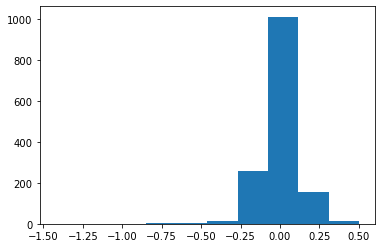

In [178]:
plt.hist(log_model.resid)
plt.show()

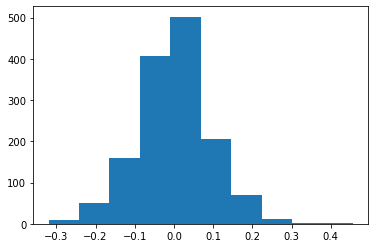

In [179]:
plt.hist(log_model_without_influential.resid)
plt.show()

In [180]:
log_model_without_influential.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     474.9
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:46:55   Log-Likelihood:                 1373.5
No. Observations:                1419   AIC:                            -2651.
Df Residuals:                    1371   BIC:                            -2399.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.8351      0.429      4.277      0.000       0.993       2.677
C(Condition1)[T.Feedr]       0.0566      0.018      3.134      0.002       0.021       0.092
C(Condition1)[T.Norm]        0.0935      0.015      6.261      0.000       0.064       0.123
C(Condition1)[T.PosA]        0.1039      0.040      2.625      0.009       0.026       0.181
C(Condition1)[T.PosN]        0.0725      0.027      2.658      0.008       0.019       0.126
C(Condition1)[T.RRAe]       -0.0133      0.032     -0.411      0.681      -0.077       0.050
C(Condition1)[T.RRAn]        0.0866      0.024      3.667      0.000       0.040       0.133
C(Condition1)[T.RRNe]        0.0828      0.068      1.215      0.225      -0.051       0.217
C(Condition1)[T.RRNn]        0.1095      0.045      2.458      0.014       0.022       0.197
C(KitchenQual)[T.Fa]        -0.0810      0.022     -3.617      0.000      -0.125      -0.037
C(KitchenQual)[T.Gd]        -0.0876      0.011     -7.763      0.000      -0.110      -0.065
C(KitchenQual)[T.TA]        -0.0980      0.013     -7.364      0.000      -0.124      -0.072
C(Functional)[T.Maj2]       -0.1543      0.050     -3.077      0.002      -0.253      -0.056
C(Functional)[T.Min1]        0.0725      0.032      2.267      0.024       0.010       0.135
C(Functional)[T.Min2]        0.1003      0.031      3.190      0.001       0.039       0.162
C(Functional)[T.Mod]         0.0227      0.038      0.597      0.551      -0.052       0.097
C(Functional)[T.Sev]        -0.4159      0.104     -4.002      0.000      -0.620      -0.212
C(Functional)[T.Typ]         0.1242      0.027      4.584      0.000       0.071       0.177
C(MSZoning)[T.FV]            0.3074      0.057      5.387      0.000       0.195       0.419
C(MSZoning)[T.RH]            0.2425      0.061      3.981      0.000       0.123       0.362
C(MSZoning)[T.RL]            0.2670      0.055      4.812      0.000       0.158       0.376
C(MSZoning)[T.RM]            0.2372      0.055      4.287      0.000       0.129       0.346
C(BldgType)[T.2fmCon]       -0.0177      0.019     -0.952      0.341      -0.054       0.019
C(BldgType)[T.Duplex]       -0.0925      0.016     -5.876      0.000      -0.123      -0.062
C(BldgType)[T.Twnhs]        -0.1264      0.016     -7.927      0.000      -0.158      -0.095
C(BldgType)[T.TwnhsE]       -0.0524      0.010     -4.992      0.000      -0.073      -0.032
C(RoofMatl)[T.CompShg]       2.5941      0.111     23.384      0.000       2.376       2.812
C(RoofMatl)[T.Membran]       2.7425      0.150     18.328      0.000       2.449       3.036
C(RoofMatl)[T.Metal]         2.6864      0.147     18.248      0.000       2.398       2.975
C(RoofMatl)[T.Roll]          2.6223      0.146     17.902      0.000       2.335       2.910
C(RoofMatl)[T.

___________
The above gives us:
1. much better adj_R2
2. much lower Omnibus stat
3. much lower Skew and Kurtosis
5. Substantially lowers JB
6. Doesn't affect D-W or Cond. No.

____________
## 7. Check for Multicollinearity of both models (log_model and log_model_without_influential)

Below is the model with all influential observations:


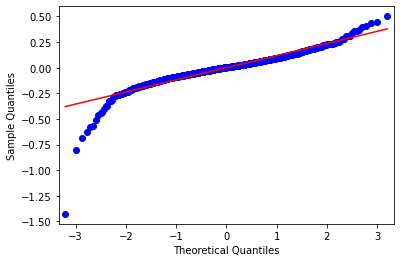

In [181]:
print("Below is the model with all influential observations:")
sm.qqplot(log_model.resid,line='s').show()

Below is the model without influential observations


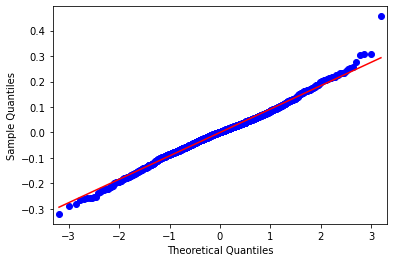

In [182]:
print("Below is the model without influential observations")
sm.qqplot(log_model_without_influential.resid,line='s').show()

In [207]:
print('original model (with influential)')

y, X = dmatrices(f'np.log(SalePrice)~{" + ".join(log_columns)}', data=train_df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

original model (with influential)
      VIF Factor                  features
0   28697.992528                 Intercept
1       2.678727    C(Condition1)[T.Feedr]
2       4.107673     C(Condition1)[T.Norm]
3       1.241566     C(Condition1)[T.PosA]
4       1.457916     C(Condition1)[T.PosN]
5       1.284827     C(Condition1)[T.RRAe]
6       1.588117     C(Condition1)[T.RRAn]
7       1.057382     C(Condition1)[T.RRNe]
8       1.122274     C(Condition1)[T.RRNn]
9       1.969761      C(KitchenQual)[T.Fa]
10      4.900285      C(KitchenQual)[T.Gd]
11      7.099427      C(KitchenQual)[T.TA]
12      1.396665     C(Functional)[T.Maj2]
13      3.284049     C(Functional)[T.Min1]
14      3.503584     C(Functional)[T.Min2]
15      2.179768      C(Functional)[T.Mod]
16      1.184573      C(Functional)[T.Sev]
17      7.201964      C(Functional)[T.Typ]
18      8.140734         C(MSZoning)[T.FV]
19      2.692102         C(MSZoning)[T.RH]
20     27.034240         C(MSZoning)[T.RL]
21     20.606040    

In [208]:
print('new model (without influential)')

y, X = dmatrices(f'np.log(SalePrice)~{" + ".join(log_columns)}', data=df_without_influential, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

new model (without influential)
      VIF Factor                  features
0   29873.072525                 Intercept
1       2.717891    C(Condition1)[T.Feedr]
2       4.194827     C(Condition1)[T.Norm]
3       1.247370     C(Condition1)[T.PosA]
4       1.430622     C(Condition1)[T.PosN]
5       1.305793     C(Condition1)[T.RRAe]
6       1.626812     C(Condition1)[T.RRAn]
7       1.061226     C(Condition1)[T.RRNe]
8       1.131263     C(Condition1)[T.RRNn]
9       1.901721      C(KitchenQual)[T.Fa]
10      4.992651      C(KitchenQual)[T.Gd]
11      7.182163      C(KitchenQual)[T.TA]
12      1.432779     C(Functional)[T.Maj2]
13      3.319020     C(Functional)[T.Min1]
14      3.643551     C(Functional)[T.Min2]
15      2.138740      C(Functional)[T.Mod]
16      1.234658      C(Functional)[T.Sev]
17      7.374296      C(Functional)[T.Typ]
18     23.096123         C(MSZoning)[T.FV]
19      5.880971         C(MSZoning)[T.RH]
20     81.815402         C(MSZoning)[T.RL]
21     62.918276      

Original model


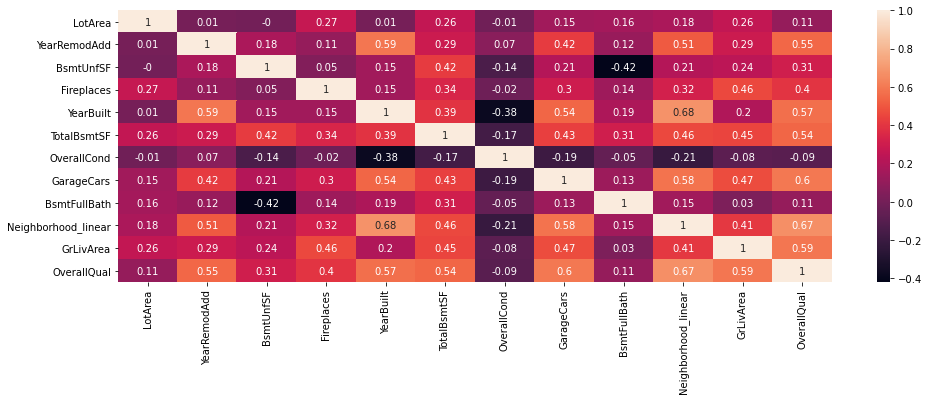

In [209]:
log_column_names = []
for i in log_columns: 
    i = i.replace('C(','')
    if 'Q(' in i:
        i = i.replace('Q("', '')
        i = i.replace(')', '')
    i = i[:-1]
    log_column_names.append(i)
    
print('Original model')
selected  = train_df[log_column_names]
correlation_matrix = selected.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

New model without influential points


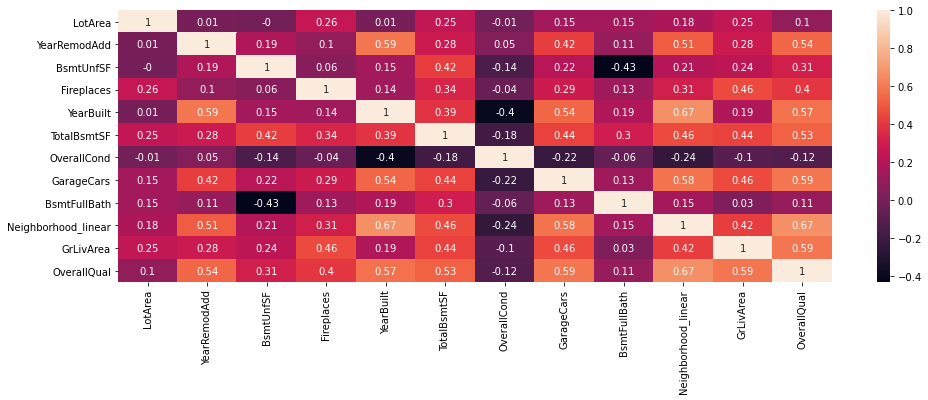

In [210]:
print('New model without influential points')
selected  = df_without_influential[log_column_names]
correlation_matrix = selected.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

___________
## 8. Use Mallow's CP and AIC/BIC to check if a subset will outpreform our full-model

In [211]:
# Do mallon's cp:
def mallons_cp_helper(Y,X, data, full_model, log=True):
    if log:
        candidate_model = smf.ols(f'np.log({Y}) ~ {"+".join(X)}', data=data).fit()
    else:
        candidate_model = smf.ols(f'{Y} ~ {"+".join(X)}', data=data).fit()
    n = candidate_model.df_resid + candidate_model.df_model + 1
    k = len(candidate_model.params)
    SSE = candidate_model.mse_resid * (n-k)
    MSE = full_model.mse_resid
    Cp = SSE/MSE - (n-2*k)
    return Cp, candidate_model.rsquared_adj, k, n

In [212]:
def mallows_script(Xs, Y, data, full_model, log=True):
    column_names = ["Number of Predictors", "Mallow's Cp", "Adj_R2", "Predictors"]
    print(f' {column_names[0]} | {column_names[1]} |  {column_names[2]} | {column_names[3]:<28}')
    print('-' * 67)
    candidate_pool = []
    for k in range(len(Xs)-1,len(Xs)-3,-1):
        for predictors in itertools.combinations(Xs, k):
            cp, adj_r, k, n = mallons_cp_helper(Y,predictors, data=data, full_model = full_model, log=log)
            if abs(cp-k) < 50:
                candidate_pool.append(predictors)
                predictors = f"[{', '.join(predictors)}]"
                print(f'{k:^21} | {cp:^11.3f} | {adj_r:>7.3f} | {predictors}')
                print()
    return candidate_pool


In [213]:
Xs = log_columns.copy()
Y = 'SalePrice'
candidate_pool = mallows_script(Xs, Y, df_without_influential, log_model_without_influential, log=True)

 Number of Predictors | Mallow's Cp |  Adj_R2 | Predictors                  
-------------------------------------------------------------------
         45           |   71.564    |   0.939 | [Q("LotArea"), Q("YearRemodAdd"), Q("BsmtUnfSF"), C(Condition1), C(KitchenQual), C(Functional), Q("Fireplaces"), C(MSZoning), C(BldgType), Q("YearBuilt"), Q("TotalBsmtSF"), C(RoofMatl), Q("OverallCond"), Q("GarageCars"), C(CentralAir), Q("Neighborhood_linear"), Q("GrLivArea"), Q("OverallQual")]

         47           |   56.761    |   0.940 | [Q("LotArea"), Q("YearRemodAdd"), Q("BsmtUnfSF"), C(Condition1), C(KitchenQual), C(Functional), Q("Fireplaces"), C(MSZoning), C(BldgType), Q("YearBuilt"), Q("TotalBsmtSF"), C(RoofMatl), Q("OverallCond"), Q("GarageCars"), C(BsmtFullBath), Q("Neighborhood_linear"), Q("GrLivArea"), Q("OverallQual")]

         44           |   81.639    |   0.939 | [Q("LotArea"), Q("YearRemodAdd"), Q("BsmtUnfSF"), C(Condition1), C(KitchenQual), C(Functional), Q("Fireplaces"), C(

In [214]:
def AIC_BIC_script(candidate_pool, data, log=True):
    print(f' AIC     | BIC     | {"Predictors":^27}')
    print('-'*50)
    for i in candidate_pool:
        if log:
            model = smf.ols(f'np.log(SalePrice) ~ {"+".join(i)}', data = data).fit()
        else:
            model = smf.ols(f'np.log(SalePrice) ~ {"+".join(i)}', data = data).fit()
        print(f'{model.aic:.3f} | {model.bic:.3f} | {str(i):<27} |')

In [215]:
AIC_BIC_script(candidate_pool, df_without_influential, log=True)

 AIC     | BIC     |         Predictors         
--------------------------------------------------
-2626.748 | -2390.151 | ('Q("LotArea")', 'Q("YearRemodAdd")', 'Q("BsmtUnfSF")', 'C(Condition1)', 'C(KitchenQual)', 'C(Functional)', 'Q("Fireplaces")', 'C(MSZoning)', 'C(BldgType)', 'Q("YearBuilt")', 'Q("TotalBsmtSF")', 'C(RoofMatl)', 'Q("OverallCond")', 'Q("GarageCars")', 'C(CentralAir)', 'Q("Neighborhood_linear")', 'Q("GrLivArea")', 'Q("OverallQual")') |
-2641.927 | -2394.815 | ('Q("LotArea")', 'Q("YearRemodAdd")', 'Q("BsmtUnfSF")', 'C(Condition1)', 'C(KitchenQual)', 'C(Functional)', 'Q("Fireplaces")', 'C(MSZoning)', 'C(BldgType)', 'Q("YearBuilt")', 'Q("TotalBsmtSF")', 'C(RoofMatl)', 'Q("OverallCond")', 'Q("GarageCars")', 'C(BsmtFullBath)', 'Q("Neighborhood_linear")', 'Q("GrLivArea")', 'Q("OverallQual")') |
-2616.566 | -2385.227 | ('Q("LotArea")', 'Q("YearRemodAdd")', 'Q("BsmtUnfSF")', 'C(Condition1)', 'C(KitchenQual)', 'C(Functional)', 'Q("Fireplaces")', 'C(BldgType)', 'Q("YearBuilt")'

__________
#### After comparing Mallow's CP, AIC and BIC, we see that our log_model_without_influential outpreforms

___________
## 9. Extended Model (ThielSen)

In [265]:
## Thiel-sen
from sklearn.linear_model import TheilSenRegressor
df_train = pd.read_csv('Data/housing/train.csv')
#Teddy's model predictors
y_train = train_df['SalePrice']
X_train2 = train_df[['TotRmsAbvGrd', 'GrLivArea', 'OverallCond', 'OverallQual', 'Neighborhood', 'ExterQual', 'BsmtQual']]
X_train2_enc = pd.get_dummies(X_train2, columns=['Neighborhood', 'ExterQual', 'BsmtQual'])
TS_reg2 = TheilSenRegressor(random_state=0).fit(X_train2_enc, y_train)
TS_reg2.score(X_train2_enc, y_train)

0.802310756856069

In [267]:
model2 = smf.ols('SalePrice ~ TotRmsAbvGrd + GrLivArea + OverallCond + OverallQual + C(Neighborhood) + C(ExterQual) + C(BsmtQual)',housedata).fit()

___________
## 10. Evaluate Models

In [216]:
test_df = pd.read_csv('Data/housing/test.csv')
test_df['Neighborhood_linear'] = test_df["Neighborhood"].map(map_dic)

In [217]:
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Neighborhood_linear
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,10
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,10
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,14


In [218]:
log_model_without_influential.predict(test_df)

0       11.633673
1       11.941729
2       12.096350
3       12.180808
4       12.126767
          ...    
1454    11.386870
1455    11.454189
1456    12.066113
1457    11.700638
1458    12.333469
Length: 1459, dtype: float64

In [283]:
X_test2 = test_df[['TotRmsAbvGrd', 'GrLivArea', 'OverallCond', 'OverallQual', 'Neighborhood', 'ExterQual', 'BsmtQual']]
X_test2_enc = pd.get_dummies(X_test2, columns=['Neighborhood', 'ExterQual', 'BsmtQual'])
thiel_predictions = TS_reg2.predict(X_test2_enc)
median_log_price = np.median(thiel_predictions[~np.isnan(thiel_predictions)])
ids = test_df['Id'].values
thiel_txt = 'Id,SalePrice'
null_ids = []
for id,pred in zip(ids, thiel_predictions):
    if np.isnan(pred):
        null_ids.append(id)
        pred = median_log_price
    thiel_txt += f'\n{id},{pred}'

In [284]:
with open('submission_thiel.csv','w') as f:
     f.write(thiel_txt)

In [285]:
model_predictions = model2.predict(test_df).values
median_log_price = np.median(model_predictions[~np.isnan(model_predictions)])
ids = test_df['Id'].values
model_txt = 'Id,SalePrice'
null_ids = []
for id,pred in zip(ids, model_predictions):
    if np.isnan(pred):
        null_ids.append(id)
        pred = median_log_price
    model_txt += f'\n{id},{pred}'

In [286]:
with open('submission_model.csv','w') as f:
     f.write(model_txt)

In [281]:
log_predictions = log_model_without_influential.predict(test_df).values
median_log_price = np.median(log_predictions[~np.isnan(log_predictions)])
ids = test_df['Id'].values
log_text = 'Id,SalePrice'
null_ids = []
for id,pred in zip(ids, log_predictions):
    if np.isnan(pred):
        null_ids.append(id)
        pred = median_log_price
    log_text += f'\n{id},{np.exp(pred)}'

In [282]:
with open('submission_log_model.csv','w') as f:
     f.write(log_text)

________
If we are so inclined, we can then submit this to Kaggle to see our score. Note that there will be some instances where the prediction is nan, and, in those cases, we will just take the mean of all predictions as our prediction.
```python
 with open('test_submission.csv','w') as f:
     f.write(text)
     
```
The above gives us the csv to submit and gives us a score of 0.15571 on Kaggle